## Practical Work 4
### mahmoud abdelmohsen abdelhai

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
x = np.linspace(1, 20, 50)
x


array([ 1.        ,  1.3877551 ,  1.7755102 ,  2.16326531,  2.55102041,
        2.93877551,  3.32653061,  3.71428571,  4.10204082,  4.48979592,
        4.87755102,  5.26530612,  5.65306122,  6.04081633,  6.42857143,
        6.81632653,  7.20408163,  7.59183673,  7.97959184,  8.36734694,
        8.75510204,  9.14285714,  9.53061224,  9.91836735, 10.30612245,
       10.69387755, 11.08163265, 11.46938776, 11.85714286, 12.24489796,
       12.63265306, 13.02040816, 13.40816327, 13.79591837, 14.18367347,
       14.57142857, 14.95918367, 15.34693878, 15.73469388, 16.12244898,
       16.51020408, 16.89795918, 17.28571429, 17.67346939, 18.06122449,
       18.44897959, 18.83673469, 19.2244898 , 19.6122449 , 20.        ])

In [5]:
a, b = -1, 2
y = a*x + b
y

array([  1.        ,   0.6122449 ,   0.2244898 ,  -0.16326531,
        -0.55102041,  -0.93877551,  -1.32653061,  -1.71428571,
        -2.10204082,  -2.48979592,  -2.87755102,  -3.26530612,
        -3.65306122,  -4.04081633,  -4.42857143,  -4.81632653,
        -5.20408163,  -5.59183673,  -5.97959184,  -6.36734694,
        -6.75510204,  -7.14285714,  -7.53061224,  -7.91836735,
        -8.30612245,  -8.69387755,  -9.08163265,  -9.46938776,
        -9.85714286, -10.24489796, -10.63265306, -11.02040816,
       -11.40816327, -11.79591837, -12.18367347, -12.57142857,
       -12.95918367, -13.34693878, -13.73469388, -14.12244898,
       -14.51020408, -14.89795918, -15.28571429, -15.67346939,
       -16.06122449, -16.44897959, -16.83673469, -17.2244898 ,
       -17.6122449 , -18.        ])

#### Plot your data points. 

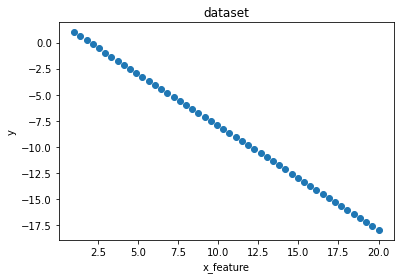

In [7]:
plt.scatter(x,y)
plt.title('dataset')
plt.xlabel('x_feature')
plt.ylabel('y')
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

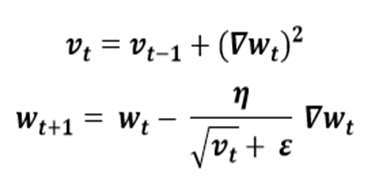

In [8]:
def adagrad(X,Y,L,epsilon,N):     ## L: learning rate, N: max. #iterations
    theta0 = 0
    theta1 = 0
    vt0, vt1 = 0, 0
    n = len(X) ## n: no. of rows/observations
    lossFunc = []
    Theta_0 = []
    Theta_1 = []
    hypothesis = []
   
    for i in range(1,N):
        Y_pred = theta0 + theta1*X
        cost = (1/2*n)*np.sum((Y_pred - Y)**2)
        lossFunc.append(cost)
        hypothesis.append(Y_pred)
        Theta_0.append(theta0)
        Theta_1.append(theta1)
        # calc. the dradient
        D_theta0 = (1/n) * np.sum(Y_pred - Y) # dervative wrt theta0
        D_theta1 = (1/n) * np.sum(X * (Y_pred - Y)) # dervative wrt theta1
        
        # calc. adaptive learning rate
        vt0 = vt0 + (D_theta0)**2
        vt1 = vt1 + (D_theta1)**2
        # update the parameters
        theta0 = theta0 - (L / (np.sqrt(vt0) + epsilon)) * D_theta0 # update theta0
        theta1 = theta1 - (L / (np.sqrt(vt1) + epsilon)) * D_theta1 # update theta1
    
    Y_pred = theta0 + theta1*X
   
    lossFunc = np.array(lossFunc)
    return Theta_0, Theta_1, lossFunc, hypothesis, Y_pred, theta0, theta1


In [116]:
Theta_0, Theta_1, loss, hyp, hx, theta0, theta1 = adagrad(x,y,0.1,1e-8,10000)
Theta0, Theta1, ada_loss, ada_hyp, ada_hx, ada_theta0, ada_theta1 = adagrad(x,y,0.15,1e-8,10000)


In [117]:
print(r2_score(y,hx))
print(r2_score(y,ada_hx))


0.9999999977399642
0.9999999999999999


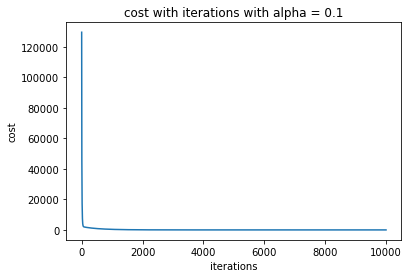

In [118]:
plt.plot(loss)
#plt.ylim(-1,2000)
plt.title('cost with iterations with alpha = 0.1')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

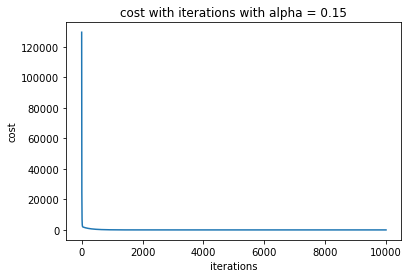

In [119]:
plt.plot(ada_loss)
#plt.ylim(-1,2000)
plt.title('cost with iterations with alpha = 0.15')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

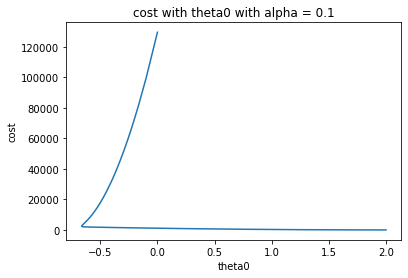

In [120]:
plt.plot(Theta_0, loss)
plt.title('cost with theta0 with alpha = 0.1')
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show()

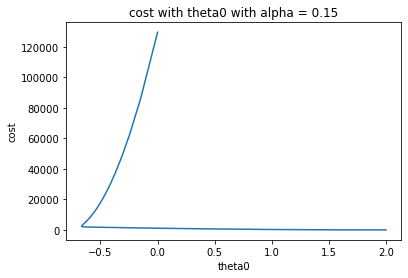

In [121]:
plt.plot(Theta0, ada_loss)
plt.title('cost with theta0 with alpha = 0.15')
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show()

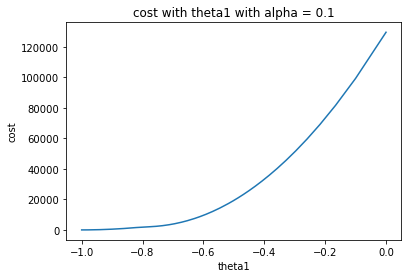

In [122]:
plt.plot(Theta_1, loss)
plt.title('cost with theta1 with alpha = 0.1')
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show()

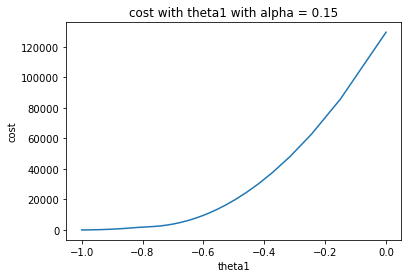

In [123]:
plt.plot(Theta1, ada_loss)
plt.title('cost with theta1 with alpha = 0.15')
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show()

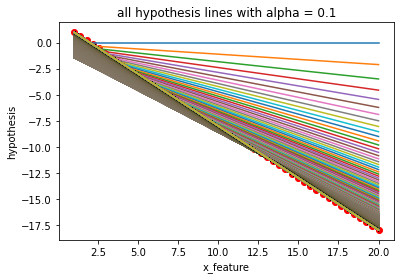

In [124]:
hyp = np.array(hyp)
plt.plot(x,hyp.T)
plt.scatter(x,y, color = 'red')
plt.title('all hypothesis lines with alpha = 0.1')
plt.xlabel('x_feature')
plt.ylabel('hypothesis')
plt.show()

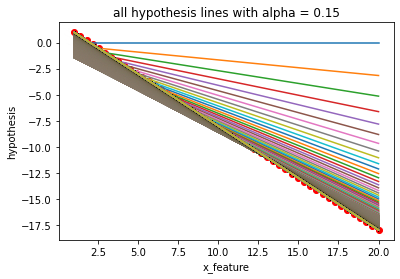

In [125]:
ada_hyp = np.array(ada_hyp)
plt.plot(x,ada_hyp.T)
plt.scatter(x,y, color = 'red')
plt.title('all hypothesis lines with alpha = 0.15')
plt.xlabel('x_feature')
plt.ylabel('hypothesis')
plt.show()

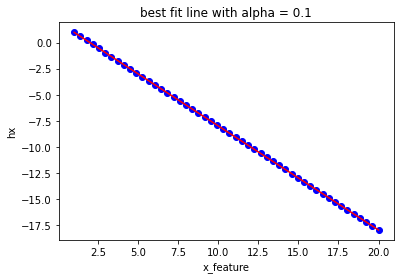

In [126]:
plt.plot(x,hx, color = 'red')
plt.scatter(x,y, color = 'blue')
plt.title('best fit line with alpha = 0.1')
plt.xlabel('x_feature')
plt.ylabel('hx')
plt.show()

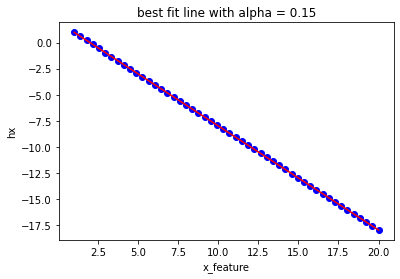

In [127]:
plt.plot(x,ada_hx, color = 'red')
plt.scatter(x,y, color = 'blue')
plt.title('best fit line with alpha = 0.15')
plt.xlabel('x_feature')
plt.ylabel('hx')
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

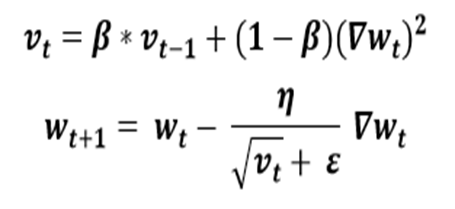

In [28]:
def rmsprop(X,Y,L,epsilon,beta,N):     ## L: learning rate, N: max. #iterations
    theta0 = 0
    theta1 = 0
    vt0, vt1 = 0, 0
    n = len(X) ## n: no. of rows/observations
    lossFunc = []
    Theta_0 = []
    Theta_1 = []
    hypothesis = []
   
    for i in range(1,N):
        Y_pred = theta0 + theta1*X
        cost = (1/2*n)*np.sum((Y_pred - Y)**2)
        lossFunc.append(cost)
        hypothesis.append(Y_pred)
        Theta_0.append(theta0)
        Theta_1.append(theta1)
        # calc. the dradient
        D_theta0 = (1/n) * np.sum(Y_pred - Y) # dervative wrt theta0
        D_theta1 = (1/n) * np.sum(X * (Y_pred - Y)) # dervative wrt theta1
        
        # calc. adaptive learning rate
        vt0 = beta * vt0 + (1 - beta) * (D_theta0)**2
        vt1 = beta * vt1 + (1 - beta) * (D_theta1)**2
        # update the parameters
        theta0 = theta0 - (L / (np.sqrt(vt0) + epsilon)) * D_theta0 # update theta0
        theta1 = theta1 - (L / (np.sqrt(vt1) + epsilon)) * D_theta1 # update theta1
        if cost == 1e-5:
            break
    
    Y_pred = theta0 + theta1*X
   
    lossFunc = np.array(lossFunc)
    return Theta_0, Theta_1, lossFunc, hypothesis, Y_pred, theta0, theta1


In [134]:
Th0, Th1, cost, hyp_rms, hx_rms, th0, th1 = rmsprop(x,y,0.01,1e-8,0.999,2000)
Th0_rms, Th1_rms, cost_rms, hyp1_rms, hx1_rms, th0_rms, th1_rms = rmsprop(x,y,0.01,1e-8,0.98,2000)


In [135]:
print(r2_score(y,hx_rms))
print(r2_score(y,hx1_rms))

1.0
0.9998694072303017


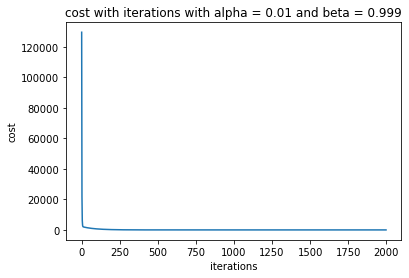

In [136]:
plt.plot(cost)
#plt.ylim(-1,2000)
plt.title('cost with iterations with alpha = 0.01 and beta = 0.999')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

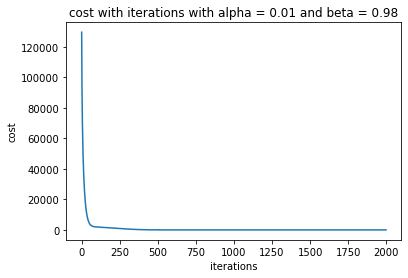

In [137]:
plt.plot(cost_rms)
#plt.ylim(-1,2000)
plt.title('cost with iterations with alpha = 0.01 and beta = 0.98')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

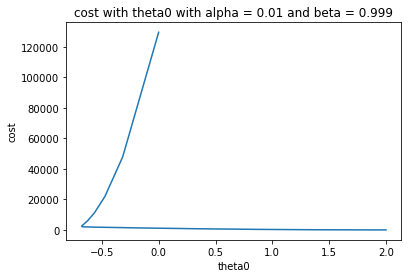

In [138]:
plt.plot(Th0, cost)
plt.title('cost with theta0 with alpha = 0.01 and beta = 0.999')
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show()

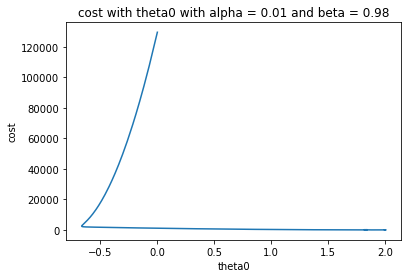

In [139]:
plt.plot(Th0_rms, cost_rms)
plt.title('cost with theta0 with alpha = 0.01 and beta = 0.98')
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show()

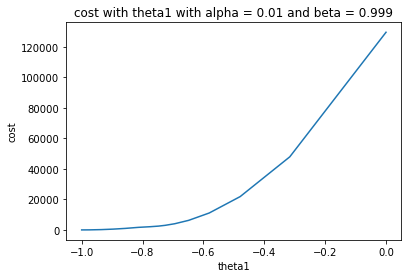

In [140]:
plt.plot(Th1, cost)
plt.title('cost with theta1 with alpha = 0.01 and beta = 0.999')
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show()

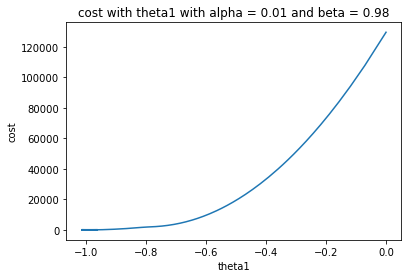

In [141]:
plt.plot(Th1_rms, cost_rms)
plt.title('cost with theta1 with alpha = 0.01 and beta = 0.98')
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show()

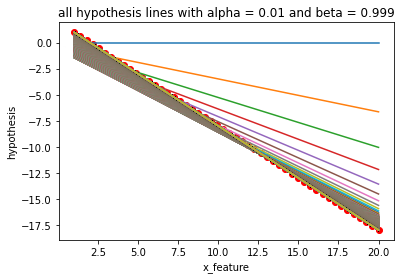

In [142]:
hyp_rms = np.array(hyp_rms)
plt.plot(x,hyp_rms.T)
plt.scatter(x,y, color = 'red')
plt.title('all hypothesis lines with alpha = 0.01 and beta = 0.999')
plt.xlabel('x_feature')
plt.ylabel('hypothesis')
plt.show()

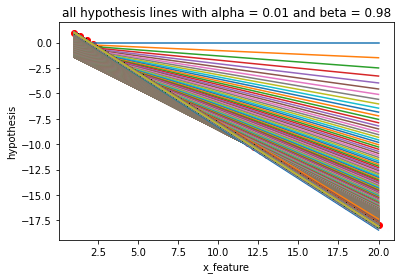

In [143]:
hyp1_rms = np.array(hyp1_rms)
plt.plot(x,hyp1_rms.T)
plt.scatter(x,y, color = 'red')
plt.title('all hypothesis lines with alpha = 0.01 and beta = 0.98')
plt.xlabel('x_feature')
plt.ylabel('hypothesis')
plt.show()

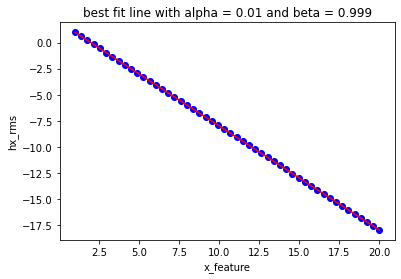

In [145]:
plt.plot(x,hx_rms, color = 'red')
plt.scatter(x,y, color = 'blue')
plt.title('best fit line with alpha = 0.01 and beta = 0.999')
plt.xlabel('x_feature')
plt.ylabel('hx_rms')
plt.show()

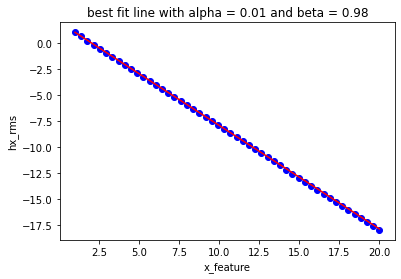

In [144]:
plt.plot(x,hx1_rms, color = 'red')
plt.scatter(x,y, color = 'blue')
plt.title('best fit line with alpha = 0.01 and beta = 0.98')
plt.xlabel('x_feature')
plt.ylabel('hx_rms')
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

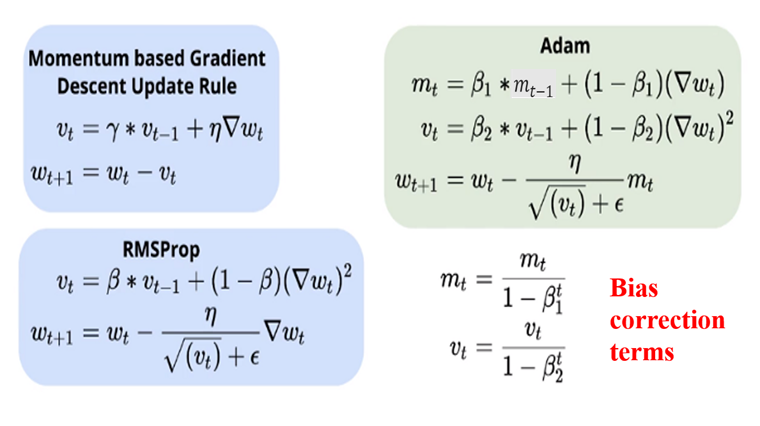

In [44]:
def adam(X,Y,L,epsilon,beta1,beta2,N):     ## L: learning rate, N: max. #iterations
    theta0 = 0
    theta1 = 0
    vt0, vt1 = 0, 0
    mt0, mt1 = 0, 0
    n = len(X) ## n: no. of rows/observations
    lossFunc = []
    Theta_0 = []
    Theta_1 = []
    hypothesis = []
   
    for i in range(1,N):
        Y_pred = theta0 + theta1*X
        cost = (1/2*n)*np.sum((Y_pred - Y)**2)
        lossFunc.append(cost)
        hypothesis.append(Y_pred)
        Theta_0.append(theta0)
        Theta_1.append(theta1)
        
        # calc. the dradient
        D_theta0 = (1/n) * np.sum(Y_pred - Y) # dervative wrt theta0
        D_theta1 = (1/n) * np.sum(X * (Y_pred - Y)) # dervative wrt theta1
        
        # calc. momentum step
        mt0 = beta1 * mt0 + (1 - beta1) * D_theta0
        mt1 = beta1 * mt1 + (1 - beta1) * D_theta1
        mt0 = mt0 / (1 - beta1 ** i)      ## bias correction term
        mt1 = mt1 / (1 - beta1 ** i)       ## bias correction term
        
        # calc. adaptive learning rate
        vt0 = beta2 * vt0 + (1 - beta2) * (D_theta0)**2
        vt1 = beta2 * vt1 + (1 - beta2) * (D_theta1)**2
        vt0 = vt0 / (1 - (beta2 ** i))      ## bias correction term
        vt1 = vt1 / (1 - (beta2 ** i))       ## bias correction term
        
        
        # update the parameters
        theta0 = theta0 - (L / (np.sqrt(vt0) + epsilon)) * mt0 # update theta0
        theta1 = theta1 - (L / (np.sqrt(vt1) + epsilon)) * mt1 # update theta1
        
        #stop condition
        if cost == 1e-5:
            break
    
    Y_pred = theta0 + theta1*X
   
    lossFunc = np.array(lossFunc)
    return Theta_0, Theta_1, lossFunc, hypothesis, Y_pred, theta0, theta1


In [150]:
ATh0, ATh1, Acost, Ahyp, Ahx, Ath0, Ath1 = adam(x,y,0.01,1e-8,0.8,0.9,5000)
A_Th0, A_Th1, A_cost, A_hyp, A_hx, A_th0, A_th1 = adam(x,y,0.001,1e-8,0.7,0.9,5000)


In [151]:
print(r2_score(y,Ahx))
print(r2_score(y,A_hx))


0.9999999921426906
0.9999999999958398


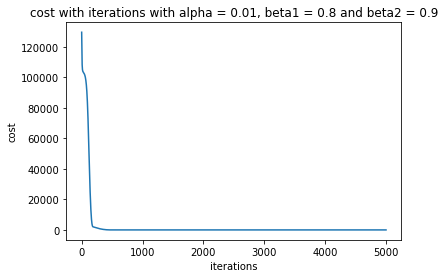

In [153]:
plt.plot(Acost)
#plt.ylim(-1,2000)
plt.title('cost with iterations with alpha = 0.01, beta1 = 0.8 and beta2 = 0.9')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

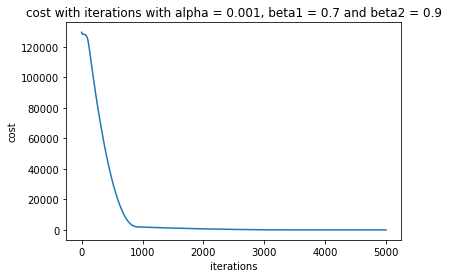

In [154]:
plt.plot(A_cost)
#plt.ylim(-1,2000)
plt.title('cost with iterations with alpha = 0.001, beta1 = 0.7 and beta2 = 0.9')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

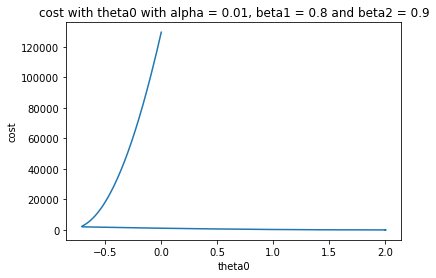

In [155]:
plt.plot(ATh0, Acost)
plt.title('cost with theta0 with alpha = 0.01, beta1 = 0.8 and beta2 = 0.9')
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show()

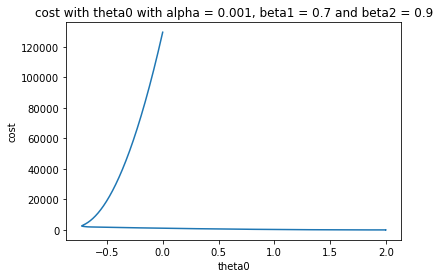

In [156]:
plt.plot(A_Th0, A_cost)
plt.title('cost with theta0 with alpha = 0.001, beta1 = 0.7 and beta2 = 0.9')
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show()

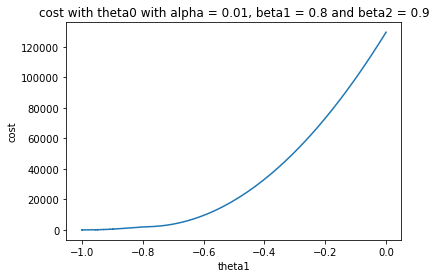

In [157]:
plt.plot(ATh1, Acost)
plt.title('cost with theta0 with alpha = 0.01, beta1 = 0.8 and beta2 = 0.9')
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show()

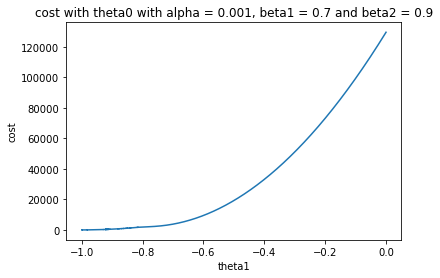

In [158]:
plt.plot(A_Th1, A_cost)
plt.title('cost with theta0 with alpha = 0.001, beta1 = 0.7 and beta2 = 0.9')
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show()

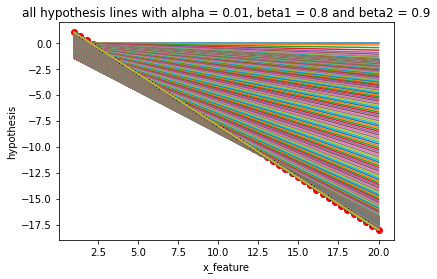

In [160]:
Ahyp = np.array(Ahyp)
plt.plot(x,Ahyp.T)
plt.scatter(x,y, color = 'red')
plt.title('all hypothesis lines with alpha = 0.01, beta1 = 0.8 and beta2 = 0.9')
plt.xlabel('x_feature')
plt.ylabel('hypothesis')
plt.show()

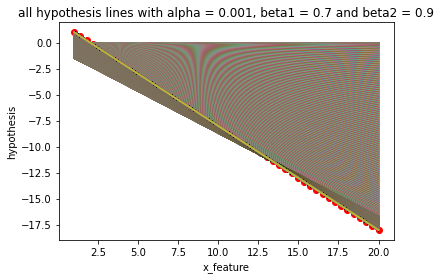

In [159]:
A_hyp = np.array(A_hyp)
plt.plot(x,A_hyp.T)
plt.scatter(x,y, color = 'red')
plt.title('all hypothesis lines with alpha = 0.001, beta1 = 0.7 and beta2 = 0.9')
plt.xlabel('x_feature')
plt.ylabel('hypothesis')
plt.show()

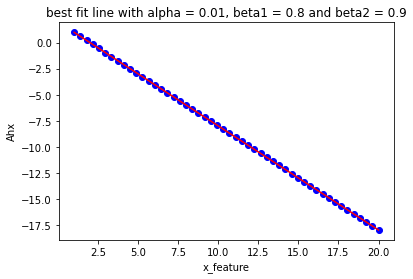

In [161]:
plt.plot(x,Ahx, color = 'red')
plt.scatter(x,y, color = 'blue')
plt.title('best fit line with alpha = 0.01, beta1 = 0.8 and beta2 = 0.9')
plt.xlabel('x_feature')
plt.ylabel('Ahx')
plt.show()

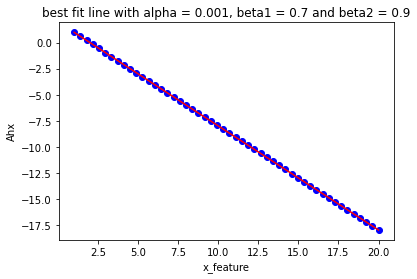

In [162]:
plt.plot(x,A_hx, color = 'red')
plt.scatter(x,y, color = 'blue')
plt.title('best fit line with alpha = 0.001, beta1 = 0.7 and beta2 = 0.9')
plt.xlabel('x_feature')
plt.ylabel('Ahx')
plt.show()

## Congratulations 
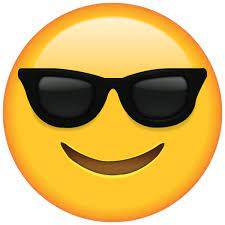